<a href="https://colab.research.google.com/github/omereyal/omer.eyal/blob/main/Omer_Eyal_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Numpy

In [ ]:
#It's a common convention to abbreviate numpy as np
import numpy as np

In [ ]:
x = np.array([1,2,3,4,5]) # create a 1 dimensional array from a list: [1,2,3,4,5]
y = np.array([[1,2,3,4,5], [6,7,8,9,10]]) # Create a 2-d array from multiple lists
x.shape #returns tuple of dimensions
x.size # returns total number of elements
x.dtype #the default dtype is float64
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype


In [ ]:
value = array[row_index, col_index] #Access to a specific element

# arange puts all number between 2 values in the tuple
# reshape changes the size of the array to the dimensions in the tuple
b = np.arange(1,17).reshape((4,4))

###matrix operations

In [ ]:
print(x - y)
print('\n', np.subtract(x, y))

print(x * y)
print('\n',np.multiply(x, y))

print(x / y)
print('\n',np.divide(x, y))

print(np.sqrt(x))

print(np.power(x,2))

[[ 0  0  0  0  0]
 [-5 -5 -5 -5 -5]]

 [[ 0  0  0  0  0]
 [-5 -5 -5 -5 -5]]
[[ 1  4  9 16 25]
 [ 6 14 24 36 50]]

 [[ 1  4  9 16 25]
 [ 6 14 24 36 50]]
[[1.         1.         1.         1.         1.        ]
 [0.16666667 0.28571429 0.375      0.44444444 0.5       ]]

 [[1.         1.         1.         1.         1.        ]
 [0.16666667 0.28571429 0.375      0.44444444 0.5       ]]
[1.         1.41421356 1.73205081 2.         2.23606798]
[ 1  4  9 16 25]


###other numpy methoods

In [ ]:
#numpy arrays have builtin methods to calculate summary statistics such as std. dev., mean, min, max, sum
y = np.random.random(12).reshape(3,4)
print("std:", y.std())
print("mean:", y.mean())
print("sum:", y.sum())

print()
#you can also do these operations with respect to a particular axis
print("std (rows):", y.std(axis = 1))
print("mean (rows):", y.mean(axis = 1))

In [ ]:
np.concatenate((x,y), axis = 0)    #adding to arrays together, on the axis given.
np.transpose(result)     #switching rows and columns
x.dot(y)
np.dot(x, y)     #calculating dot product
np.matmul(x,y)   # matrix multiplication

In [ ]:
#using boolean mask:
array = np.array(range(20)).reshape((4,5))
output = array > 10
output

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

if we want to do operrations on the matrix but keep the original we'll use .copy

In [ ]:
import copy
y = copy.deepcopy(x)

y = x.copy()      #builtin numpy copy method

#Image Basics

In [ ]:
#import our drive
from google.colab import drive
drive.mount('/content/drive')
# create a working folder
folder_path = '/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Omer.Eyal'

###important libraries

In [ ]:
import skimage
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt

###read and display an image

In [ ]:
image = skimage.io.imread(fname=f"{folder_path}/images_path")
plt.figure(figsize=(5,5)) #size of figure
plt.imshow(image)

###grayscale and channels

link for colormaps: https://matplotlib.org/tutorials/colors/colormaps.html

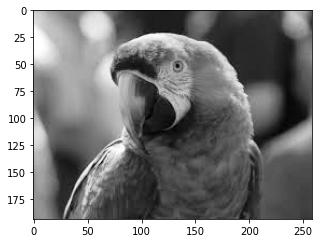

In [ ]:
# convert to grayscale and display
gray_image = skimage.color.rgb2gray(image)
plt.figure(figsize=(5,5))
plt.imshow(gray_image, cmap='Greys_r')

In [ ]:
#Extract a specific channel
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

In [ ]:
# function to exclude a specific channel from a given image
def rgb_exclusion(image, channel):
    out = image
    if channel == 'R':
        out[:, :, 0] = 0
    elif channel == 'G':
        out[:, :, 1] = 0
    elif channel == 'B':
        out[:, :, 2] = 0

    return out

In [ ]:
# Adding the channels back again using np.stack()
# The axis parameter specifies the index of the new axis in the dimensions of the result.
# For example, if axis=0 it will be the first dimension and if axis=-1 it will be the last dimension.
stacked = np.stack((red_channel,green_channel,blue_channel),axis=-1) 

(194, 259, 3)

###cv2 (split and merge channels)

In [ ]:
# Importing cv2
import cv2 
from google.colab.patches import cv2_imshow

# Reading the image using imread() function
image = cv2.imread(f"{folder_path}/image_path") # image is read as BGR
  
# Displaying the original image
cv2_imshow(image) # opencv displays the image as RGB

# Using cv2.split() to split channels of coloured image 
b,g,r = cv2.split(image)

# cv2.merge()
merged_image = cv2.merge([r, g, b]) # notice that we merged to RGB and not BGR

###Function for displaying a list of images side by side:

In [ ]:
from skimage import img_as_float

def imshow_all(images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap = 'gray')
        ax.set_title(label)


#Multidimensional Arrays and Spectral Indices

###preprocessing

In [ ]:
!pip install spectral # a library for reading hyperspectral images

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


relevant libs

In [ ]:
from spectral import imshow, view_cube, ndvi
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import skimage.io as io

**Using envi.open() function we open both RAW and HDR file, we need three type of data here: dark reference, white reference and data capture:**

In [ ]:
# these file were obtained from a hyperspectral camera
dark_ref = envi.open(f'{hdr_path}/DARKREF_1341.hdr', f'{hdr_path}/DARKREF_1341.raw')
white_ref = envi.open(f'{hdr_path}/WHITEREF_1341.hdr', f'{hdr_path}/WHITEREF_1341.raw')
data_ref = envi.open(f'{hdr_path}/1341.hdr', f'{hdr_path}/1341.raw')

**With numpy, we convert the loaded data to numpy array:**

In [ ]:
white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

**Using [correction formula](https://en.wikipedia.org/wiki/Flat-field_correction), the captured data is subtracted by dark reference and divided with white reference subtracted dark reference. To show our currently corrected image, use imshow from spectral library:**

ImageView object:
  Display bands       :  (100, 100, 100)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0030581040773540735, 1.2652438879013062]
    G: [0.0030581040773540735, 1.2652438879013062]
    B: [0.0030581040773540735, 1.2652438879013062]

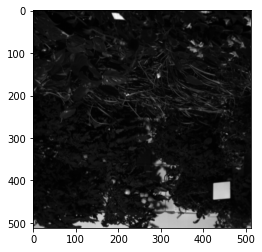

In [ ]:
corrected_nparr = np.divide(
    np.subtract(data_nparr, dark_nparr),
    np.subtract(white_nparr, dark_nparr))

imshow(corrected_nparr, (100, 100, 100))



**Reading the bands (wavelengths) list into a numpy array for future plotting:**

In [ ]:
bands = np.genfromtxt(f'{hdr_path}/bands.csv', delimiter=',')

Function that gives the reflectance spectrum of a specific pixel:

In [ ]:
def plot_pixel(img,pixel_y,pixel_x,bands):

  leaf_pixel = img[
      pixel_y:pixel_y+1,
      pixel_x:pixel_x+1,
      :]

  leaf_pixel_squeezed = np.squeeze(leaf_pixel)

  plt.plot(bands, leaf_pixel_squeezed)
  plt.title('Spectral Footprint\n(Pixel {},{})'.format(
      pixel_x, pixel_y),fontsize=16)
  plt.xlabel('Wavelength',fontsize=14)
  plt.ylabel('Reflectance',fontsize=14)
  plt.show()

Same with more pixels:

In [ ]:
def plot_several_pixel(img,pixels_tuples_array,bands):
  for pixel_xy in pixels_tuples_array:
    leaf_pixel = img[ 
      pixel_xy[1]:pixel_xy[1]+1, #y pixel
      pixel_xy[1]:pixel_xy[1]+1, #x pixel
      :]
    leaf_pixel_squeezed = np.squeeze(leaf_pixel) #squeeze

    plt.plot(bands, leaf_pixel_squeezed, label =f"x={pixel_xy[1]}, y={pixel_xy[1]}"  )
  plt.title('Spectral signature',fontsize=16)
  plt.xlabel('Wavelength',fontsize=14)
  plt.ylabel('Reflectance',fontsize=14)
  plt.legend()
  plt.show()

flip an image:

In [ ]:
flipped = np.fliplr(rgb_tomato_wall) # using np.fliplr() to flip the image vertically, because the hyperspectral camera always flips the image when obtained

###NDVI

 $$NDVI = \frac{(NIR - RED)}{(NIR + RED)}$$

In [ ]:
red_channel = corrected_nparr[:,:,87] # 651.92 nm
nir_channel = corrected_nparr[:,:,140] # 810.86 nm

NDVI = (nir_channel - red_channel) / (nir_channel + red_channel) # calc manually
vi = ndvi(corrected_nparr, 87, 140) # using the ndvi function from spectral to calc, arguments: image, red band number, nir band number

example for calculating NDVI:

Text(0.5, 1.0, 'Tomato plants NDVI')

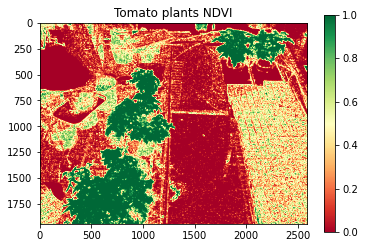

In [ ]:
# testing out NDVI on regular jpeg images (from security camera)

# reading in images
white_nparr = io.imread(f'{folder_path}/images/ndvi/white_ref.jpg')
dark_nparr = io.imread(f'{folder_path}/images/ndvi/dark_ref.jpg')
data_nparr = io.imread(f'{folder_path}/images/ndvi/rgb.jpg')
nir = io.imread(f'{folder_path}/images/ndvi/nir.jpg')

# loading the first channel from each image
white_nparr = white_nparr[:,:,0]
dark_nparr = dark_nparr[:,:,0]
data_nparr = data_nparr[:,:,0]
nir = nir[:,:,0]

# correcting the original image using the references
corrected_nparr_red = np.divide(
    np.subtract(data_nparr, dark_nparr),
    np.subtract(white_nparr, dark_nparr))

corrected_nparr_nir = np.divide(
    np.subtract(nir, dark_nparr),
    np.subtract(white_nparr, dark_nparr))


nir_channel = corrected_nparr_nir
red_channel = corrected_nparr_red
np.seterr(invalid='ignore') # ignore 0/0 when dividing

# NDVI calculation
NDVI = (nir_channel - red_channel) / (nir_channel + red_channel) # calc manually

# displaying the NDVI
plt.imshow(NDVI > 0, cmap='RdYlGn') # notice the chosen colormap
plt.colorbar()
plt.title('Tomato plants NDVI')

###Normalize an image (convert to range from 0 to 1)

 $$ExG = 2*GREEN - RED - BLUE$$

 source: https://www.intechopen.com/chapters/74451

Text(0.5, 1.0, 'ExG Index, mean: 0.22')

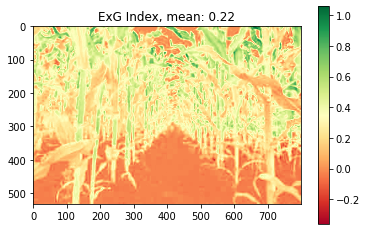

In [ ]:
# process the image for calculating the ExG index

b,g,r= cv2.split(img) # split the images into channels
np.seterr(invalid='ignore') # ignore 0/0 when dividing

# function to normalize each channel
def normalize(img):
  return (img - np.min(img)) / (np.max(img) - np.min(img))

# you can also use img_as_float - uncomment to check
# from skimage.util import img_as_float
# image = img_as_float(img)

r,g,b = normalize(r), normalize(g), normalize(b) # normalizing all channels

exg = 2*g-r-b # calculating the index
exg_mean = np.nanmean(exg) # calc the mean of the image

# display
plt.imshow(exg, cmap='RdYlGn')
plt.colorbar()
plt.title(f'ExG Index, mean: {exg_mean:.2f}') # notice the mean printed in the title, and only 2 digits after decimal point (using a f-string). Read more about f-strings here: https://realpython.com/python-f-strings/

# Reading multiple images from a folder using glob 

In [ ]:
# import libs
import glob
import skimage.io as io

In [ ]:
# load file paths from chosen folder into a list
path_list = glob.glob(f'{folder_path}/images/*.*') #Rerurns a list of file names

In [ ]:
#Now let us load each file at a time...
image_list=[]  # Empty list to store images from the folder.
path = "images/test_images/*.*"
for path in path_list:   #Iterate through each file in the list using for
    print(path)     # just stop here to see all file names printed
    img = io.imread(path)  # now, we can read each file since we have the full path
    image_list.append(img)  #C reate a list of images (not just file names but full images)

/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/corn.jpg
/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/monaLisa.jpg
/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/ct_scan.jpg
/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/parrot.jpeg
/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/mouse_liver.jpg


#Downloading images

###create a new directory

In [ ]:
# function to create a folder if doesn't exist

import os # import os lib

def createDir(path):
  doesExist = os.path.exists(path) # checks whether the specified path exists
  if not doesExist:
    os.makedirs(path) # create path, since it doesn't exist
    print("The new directory was created!")

###download an image from URL

In [ ]:
# function to download an image from a url

import requests # lib to request image from web
import shutil # lib to save the image locally


def downloadImageFromURL (url='', destination_image_path=''):

  # The method will take in two parameters, the url variable you created earlier, and stream: True.
  # by adding this second argument in guarantees no interruptions will occur when the method is running.
  res = requests.get(url, stream = True) 

  if res.status_code == 200:
      with open(destination_image_path,'wb') as f:
          shutil.copyfileobj(res.raw, f)
      print('Image sucessfully Downloaded: ', destination_image_path)
  else:
      print('Image Couldn\'t be retrieved')

###Download an image directly from google

In [ ]:
# first uninstall the lib that colab has (enter 'y' to uninstall, and restart runtime)
!pip uninstall google_images_download

# then install the updated library
!pip install git+https://github.com/Joeclinton1/google-images-download.git

In [ ]:
# imports libs (again, since runtime was restarted)
import numpy as np
from matplotlib import pyplot as plt
import cv2
import skimage.io as io

# import the newly installed library
from google_images_download import google_images_download

# function to download images from Google Image Search
def downloadImagesFromGoogle(words_to_search='', number_of_imgs=3):

  response = google_images_download.googleimagesdownload() #instantiate the class
  arguments = {"keywords":words_to_search,
              "limit":number_of_imgs,"print_urls":False}
  paths = response.download(arguments)  
  print(paths) #print complete paths to the downloaded images

read a list of images into a row:

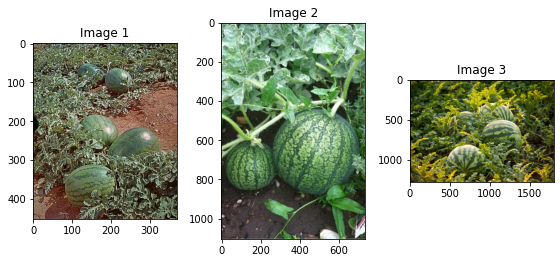

In [ ]:
# displaying the downloaded images
fig, ax=plt.subplots(ncols=len(img_list), nrows=1, figsize=(8, 8))
plt.tight_layout() # nicer layout

# loop to plt.imshow all the images in one row
for i in range(len(img_list)):
  ax[i].imshow(img_list[i])
  ax[i].set_title(f'Image {i+1}')

#Histograms

###Using OpenCV:

**What is a histogram?**
So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just **another way of understanding the image.** By looking at the histogram of an image, you get intuition about contrast, brightness and intensity distribution of that image.

This is the **function** to find the histogram:

       hist = cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

Let's familiarize with the function and its parameters :


1.   **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
2.   **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
3. **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
4. **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
5. **ranges** : this is our RANGE. Normally, it is [0,256]. (the hist and accumalte inside the ranges, enables to compute a single histogram from several sets of arrays.)


one channel:

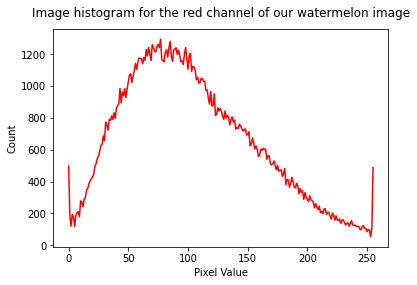

In [ ]:
# computing the histogram of the red channel of our watermelon image
img = img_list[0].copy()
hist = cv2.calcHist([img],[0],None,[256],[0,256]) # our image, first channel(0=red), no mask, 256 bins, range 0-255
  
# plot the above computed histogram
plt.plot(hist, color='r') # red color for the line
plt.title('Image histogram for the red channel of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

Multiple Channels:

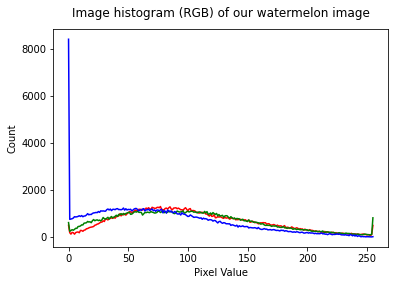

In [ ]:
# computing the histogram of all channels of our watermelon image
img = img_list[0].copy()
  
# plot the above computed histogram
colors = ('r','g','b') # for the line color

for i,color in enumerate(colors):
  hist = cv2.calcHist([img],[i],None,[256],[0,256]) # our image, channel(0/1/2), no mask, 256 bins, range 0-255
  plt.plot(hist, color = color) # r/g/b color for each line
plt.title('Image histogram (RGB) of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

###Using matplotlib

One Channel:

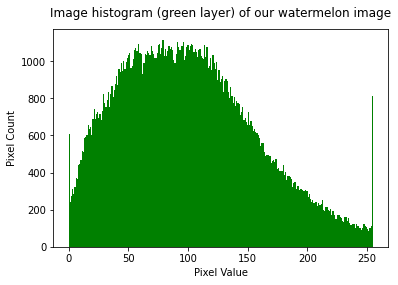

In [ ]:
# using plt to plot a histogram (one channel)

hist_with_plt = plt.hist(img[:,:,1].flatten(), bins = 256, color='g')
plt.title('Image histogram (green layer) of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

Multiple Channels

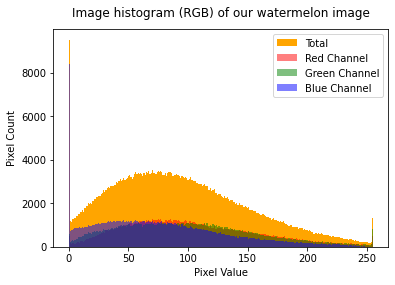

In [ ]:
# using plt to plot a histogram (multi channel)

colors = ('r','g','b') # for the line color

hist = plt.hist(img.flatten(), bins = 256, color = 'orange') # plotting the total histogram

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Image histogram (RGB) of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

#Operations on Images

###Addition

resize one image to fit the other:

Text(0.5, 1.0, '(209, 481, 3)')

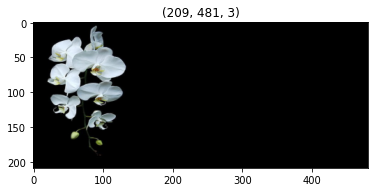

In [ ]:
# resize the large one (2) to the smaller one (1)
resized2 = cv2.resize(images_list[0], (481,209), interpolation = cv2.INTER_AREA)
plt.imshow(resized2)
plt.title(resized2.shape)

Function for adding images:

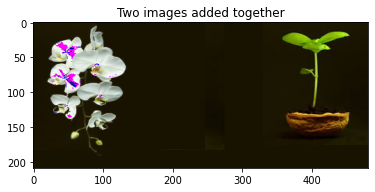

In [ ]:
# adding the images together
# Try to imagine the outcome before you do the actual calculation. What do you think is going to happen?

if images_list[1].shape == resized2.shape:
  added_img = images_list[1] + resized2
  plt.imshow(added_img)
  plt.title('Two images added together')
else:
  print('Shapes are different, cannot add.')

By adding we changed the image a litlle, we can change it by using img_as_float

Text(0.5, 1.0, 'Two images added together')

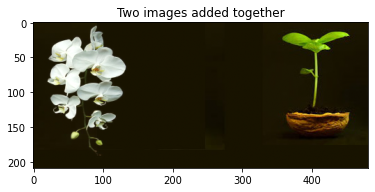

In [ ]:
from skimage import img_as_float
image2 = img_as_float(resized2)
image1 = img_as_float(images_list[1])
added1_img = image1 + image2
plt.imshow(added1_img)
plt.title('Two images added together')

###Multiplication

First we'll change the image into a float:

In [ ]:
dark_img_float = img_as_float(dark_img.copy())

Then, we can multiply the image by any number. It's useful for making the image lighter

In [ ]:
multiplyed = dark_img_float*3

###Devision

Image division operation can be used for change detection like a subtraction but instead of giving the absolute change for each pixel value from one image to another, division operation gives the fractional change or ratio between corresponding pixel values.

Here we'll also want to resize and also convert into a float:

In [ ]:
# resize the large one (2) to the smaller one (1)
resized2 = cv2.resize(images_list[0], (481,209), interpolation = cv2.INTER_AREA)

#convert into a float:
from skimage import img_as_float
image2 = img_as_float(resized2)
image1 = img_as_float(images_list[1])

Then, we can devide the images:

In [ ]:
divided_image = images_float/no_objects_float

#Image Filtering

###The Mean Filter

The meaning of "mean kernel" should be clear now: Each pixel was replaced with the mean value within the 3x3 neighborhood of that pixel. When the kernel was over `n` bright pixels, the pixel in the kernel's center was changed to n/9 (= n * 0.111). When no bright pixels were under the kernel, the result was 0.

This filter is a simple smoothing filter and produces two important results:
1. The intensity of the bright pixel decreased.
2. The intensity of the region near the bright pixel increased.

Define a mean kernel:

In [ ]:
mean_kernel = np.full((3, 3), 1/9) # defining our mean kernel (3,3) with values of 1/9

Apply a mean filter on an image:

In [ ]:
import scipy.ndimage as ndi
mean_img = ndi.correlate(img, mean_kernel))

###Downsampled Image

sometime, to see the filtering we'll downsampled the image

In [ ]:
pixelated = image[0::10, 0::10] # Using the array[0::10] notation, which only considers every tenth index.

###Gaussian Filter

Guassian Filter with skimage filters:

In [ ]:
from skimage import filters

sigma = 1 # for the gaussian filter
smooth = filters.gaussian(img, sigma)

In [ ]:
# sigma defines the std dev of the gaussian kernel
# cval is a value to fill past edges of input if mode is ‘constant’. Default is 0.0
gaussian_using_skimage = skimage.filters.gaussian(img, sigma=1, mode='constant', cval=0.0)

The Gaussian filter returns a float image, regardless of input. Cast to float so the images have comparable intensity ranges.

Gaussian filter using openCV:

In [ ]:
# agruments: image, kernel size, sigma values, border type (padding, etc.)
# cv2.BORDER_CONSTANT adds a constant color border
gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT) 

###Unsharp Mask

Unsharp mask **enhances edges by subtracting an unsharp (smoothed) version** of the image from the original.
Effectively making the filter a high pass filter. 

*enhanced image = original + amount * (original - blurred)*

**Amount of sharpening** can be controlled via scaling factor, a multiplication factor
for the sharpened signal. 

**skimage** uses Gaussian smoothing for image blurring therefore the radius parameter in the unsharp masking filter refers to the sigma parameter of the gaussian filter.

In [ ]:
# applying the Unsharp Mask
gaussian_img = gaussian(img, sigma=2, mode='constant', cval=0.0) # creating our blured version

# enhanced image = original + amount * (original - blurred)
enhanced_image = img + (img - gaussian_img)*1.

###Basic Edge Filtering

For images, edges are boundaries between light and dark values. The detection of edges can be useful on its own, or it can be used as preliminary step in other algorithms (which we'll see later).

In [ ]:
# lets create a vertical and horizonal kernels
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])
horizonal_kernel = (vertical_kernel.T)


# convolve our above image
gradient_vertical = ndi.correlate(pixelated.astype(float), vertical_kernel)
gradient_horizonal = ndi.correlate(pixelated.astype(float), horizonal_kernel)

#Compute the gradient
gradient = np.hypot(gradient_horizonal, gradient_vertical)

###Sobel Edge Filter

Smoothing is often used as a preprocessing step in preparation for feature detection and image-enhancement operations because sharp features can distort results.

In [ ]:
smooth = filters.gaussian(img, sigma=1)
gradient = filters.sobel(smooth)

### Canny Edge Detector

**The Process of Canny edge detection algorithm can be broken down to 5 different steps:**
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges (supplied by the user)
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that
are weak and not connected to strong edges.

In [ ]:
# Applying Canny
canny_edge = cv2.Canny(img, 195, 200)  #Supply Thresholds 1 and 2 

3 Automatic thresholds for canny:

In [ ]:
otsu_thresh, _ = cv2.threshold(img_blur, 0, 255, cv2.THRESH_OTSU)
triangle_thresh, _ = cv2.threshold(img_blur, 0, 255, cv2.THRESH_TRIANGLE)
manual_thresh = np.median(img_blur)

def get_range(threshold, sigma=0.33):
    return (1-sigma) * threshold, (1+sigma) * threshold

otsu_thresh = get_range(otsu_thresh)
triangle_thresh = get_range(triangle_thresh)
manual_thresh = get_range(manual_thresh)

###Median Filter

We'll use the Median Filter for bluring the image without smooth the edges:

In [ ]:
#Disk creates a circular structuring element, similar to a mask with specific radius
from skimage.morphology import disk
neighborhood = disk(radius=1)  # "structuring element", matrix of ones though corners are zeroes

median = filters.rank.median(pixelated, neighborhood) # applying the median filter, needs 8 bit, not float.

###Bilateral Filter

In [ ]:
# using cv2
import cv2
from skimage import img_as_ubyte

# d - diameter of each pixel neighborhood used during filtering
# sigmaCOlor - Sigma of grey/color space. 
# sigmaSpace - Large value means farther pixels influence each other (as long as the colors are close enough)
bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)

### Non-local means (NLM) filter

Works well for random gaussian noise but not as good for salt and pepper

The non-local means algorithm replaces the value of a pixel by an average 
of a selection of other pixels values: small patches centered on the other 
pixels are compared to the patch centered on the pixel of interest, and the 
average is performed only for pixels that have patches close to the current patch. 

Read more: https://www.iro.umontreal.ca/~mignotte/IFT6150/Articles/Buades-NonLocal.pdf

In [ ]:
# import libs
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

"""
The estimate_sigma function can provide a good starting point for setting 
the h (and optionally, sigma) parameters for the non-local means algorithm. 
h is a constant that controls the decay in patch weights as a function of the distance between patches. 
Larger h allows more smoothing between disimilar patches.
When the fast_mode argument is False, a spatial Gaussian weighting is applied 
to the patches when computing patch distances. When fast_mode is True a 
faster algorithm employing uniform spatial weighting on the patches is applied.
"""

### THIS IS THE CODE FOR THE NLM - change the 'img' to your images
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)


### Total variation filter (TVF)

Works well for random gaussian noise but not as good for salt and pepper


In [ ]:
import cv2
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt

"""
denoise_tv_chambolle(image, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)
weight: The greater weight, the more denoising (at the expense of fidelity to input).
eps: Relative difference of the value of the cost function that determines the stop criterion. 
n_iter_max: Max number of iterations used for optimization
"""

# applying the filter
denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)


###Interpolation:

Different methoods of interpolation:

In [ ]:
width, height = lion_img.size

# Interpolation 
from PIL import Image
im_nearest = lion_img.resize((width*4 ,height), Image.NEAREST)

im_bilinear = lion_img.resize((width*4 ,height), Image.BILINEAR) 

im_bicubic = lion_img.resize((width*4 ,height), Image.BICUBIC) 


### Fourier Transform

Fourier transform converts an image (or any signal) from spatial (or time) domain to frequency domain. Here's an example with Python.

In [ ]:
# Applying discrete fourier transform 
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT) # notice that cv2.dft takes only float32

#Shift DFT.
dft_shift = np.fft.fftshift(dft) # (if we don't shift then the ft wil be at the top of image, and won't be seen)


#Calculate magnitude spectrum from the DFT
#Added 1 as we may see 0 values and log of 0 is indeterminate
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)

#As the spatial frequency increases (bars closer), 
#the peaks in the DFT amplitude spectrum move farther away from the origin

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text('FFT of image')
plt.show()

For a real image:

In [ ]:
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"


# imports libs
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io

img = cv2.imread(img_path, 0) # load an image

#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Rearranges a Fourier transform X by shifting the zero-frequency 
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])




#Segmentation

### Histogram based thresholding

Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from colour or grayscale into a binary image, i.e., one that is simply black and white. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with.

#### **Manual**

We'll choose threshold by making a histogram for the image:

In [ ]:
# show histogram to see which pixel range is good for our image
hist_with_plt = plt.hist(img.flatten(), bins = 256, color='gray')

then we'll make a mask:

In [ ]:
# Manual thresholding by setting threshold value to numpy array
# After thresholding we will get a binary image.
mask = (img > 0.55)

And then we apply the mask on the image:

In [ ]:
masked_img[mask == 0] = 0 # if mask is False, then zero the pixel in the original image
masked_img[mask != 0] = img[mask != 0] # if mask is True, then leave the original image

#### **Manual, using OpenCV**

In [ ]:
#Using opencv to perform manual threshold
# All pixels above 0.55 will have pixel value 1
# Should be exactly same as the above method. 
ret1, thresh1 = cv2.threshold(img, 0.55, 1, cv2.THRESH_BINARY)

#### **Auto, using Otsu**

There's an automatic threshold methood called Otsu’s method. It is particularly useful for situations where the grayscale histogram of an image has two peaks that correspond to background and objects of interest.

In [ ]:
# Using cv2 for otsu based automatic thresholding

from skimage import img_as_ubyte
ret2, thresh2 = cv2.threshold(img_as_ubyte(img),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


In [ ]:
# Using skimage for otsu based automatic thresholding
# The skimage.filters.threshold_otsu() function can be used to determine the threshold automatically via Otsu’s method
import skimage
from skimage import filters
# perform automatic thresholding
t = skimage.filters.threshold_otsu(img)

# create a binary mask with the threshold found by Otsu's method
binary_mask = img > t


#### Auto multi thresholding

We can choose more then one threshold:

In [ ]:
# Image segmentation and morphological operators

from matplotlib import pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu
import cv2

# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(img, classes=4)

And apply the multi-thresholding on an image:

In [ ]:
# Digitize (segment) original image into multiple classes.
# np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(img, bins=thresholds)

We can look on a specific region:

In [ ]:
# Lets take a look at region 3
plt.imshow(regions==3, cmap='gray')

### Using texture to segment images

**Using entropy:**

In a nutshell, the entropy function gives a value that represents level of complexity in a certain section of an image. The resulting values are of course subject to the initial structuring element we chose.

In [ ]:
#Entropy -  quantifies disorder.

from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(img, disk(7)) # play with the disk size to get better results


We'll make a binary mask for the entropy:

In [ ]:
#Now let us use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)
plt.show()
thresh = threshold_otsu(entropy_img)

#Now let us binarize the entropy image 
binary = entropy_img <= thresh


If we want to get reed of holes:

In [ ]:
# a method to fill in holes

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8)) # define a kernel (change size if needed)
res = cv2.morphologyEx(img_as_ubyte(binary),cv2.MORPH_OPEN,kernel) # applying the kernel to our binary (make sure it's not a boolean array)

Inverting the mask:

In [ ]:
# lets take invert the mask, so the colony will be with high values
# Inverting the mask by performing bitwise-not operation
new_mask = cv2.bitwise_not(res)

Apply the mask on the original image by multiply it:

In [ ]:
# let us see the masked image
# display the results
plt.imshow(new_mask*img, cmap='gray')

### Image segmentation using color spaces

You have a bunch of colors in your image, and you want to segment each object based on its color.

link for hsv colospaces: https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv/48367205#48367205

In [ ]:
# convert to hsv color space
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # convert rgb to hsv

mask = cv2.inRange(hsv, (100,90,90), (120,255,255)) # mask out the blue. range of hsv. from hsv1 to hsv2. 
# we chose only h and s. v we made same as s

#mask = cv2.inRange(hsv, (0,0,180), (180,70,255)) # White

Closing holes if needed:

In [ ]:
from scipy import ndimage as nd
closed_mask = nd.binary_closing(mask, np.ones((5,5)))

Also, we can label our mask:

In [ ]:
label_image = measure.label(closed_mask)

Display the labels on our RGB image:

In [ ]:
# returns an RGB image where color-coded labels are painted over the image, using label2rgb
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_image, image=img) # display the labels, abovee our original image (img)

### Image segmentation using watershed


**Watershed segmentantion** is one of the most popular algorithm for image segmentation, normally used when we want to resolve one of the most difficult operations in image processing — separating similar objects in the image that are touching each other.

In essence, we partition the image into two different sets:


*   catchment basins — dark areas; The group of connected pixels with the same local minimum.
*   watershed lines — Lines that divide one catchment area from another.


**Workflow:**


1.   Binary image
2.   Calculate a distance transform
3.   Find local maxima points
4.   Label the marks




In [ ]:
# import libs
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import io, img_as_ubyte

'''
The imutils library is a series of convenience functions to make basic image processing functions such as translation,
rotation, resizing, skeletonization, and displaying Matplotlib images easier with OpenCV and Python 3.'''
import imutils

In [ ]:
# continued

shifted = cv2.pyrMeanShiftFiltering(img, 21, 51) # mean shift filtering to aid the thresholding step. only for rgb. read more here: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#pyrmeanshiftfiltering
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY) # color to gray
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

Now we can apply our watershed.

The first step in applying the watershed algorithm for segmentation is to compute the Euclidean Distance Transform (EDT) via the distance_transform_edt function. As the name suggests, this function computes the Euclidean distance to the closest zero (i.e., background pixel) for each of the foreground (our coins) pixels.

In [ ]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)

# Now we take D , our distance map, and find peaks (i.e., local maxima) in the map. We’ll ensure that is at least a 20 pixel distance between each peak.
localMax = peak_local_max(D, indices=False, min_distance=10,
	labels=thresh)

Now we take the output of the peak_local_max function and apply a connected-component analysis using 8-connectivity. The output of this function gives us our markers which we then feed into the watershed function. 

Since the watershed algorithm assumes our markers represent local minima (i.e., valleys) in our distance map, we take the negative value of D.

The watershed function returns a matrix of labels , a NumPy array with the same width and height as our input image. Each pixel value as a unique label value. Pixels that have the same label value belong to the same object.

In [ ]:
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh) #  matrix of labels

The last step is to simply loop over the unique label values and extract each of the unique objects:

In [ ]:
# loop over the unique labels returned by the Watershed algorithm
total_area = [] # list to store areas of onjects

for i,label in enumerate(np.unique(labels)):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
	# otherwise, allocate memory for the label region, and set the pixels belonging to the current label to 255 (white). draw it on the mask.
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255


	# detect contours in the mask and grab the largest one — this contour will represent the outline/boundary of a given object in the image.
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	
	# calc area and append to list
	area = cv2.contourArea(c)
	total_area.append(area)
	print(f'Object number {i} has an area = ', area)
 	
 
	# draw the contours enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)  # We find the circumcircle of an object using the function cv.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.
	cv2.putText(img_rgb, "#{}".format(label), (int(x) - 15 , int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) # draw the ID on the object
	cv2.drawContours(img_rgb, cnts, -1, (0,255,0), 1) # draw the counters
 
# show the output image
plt.imshow(img_rgb)

####Function for watershed

In [ ]:
# your code goes here
def water_shed(img_path, distance):
  img = cv2.imread(img_path) # read image
  if img.dtype != 'uint8':
    segmented_image = img_as_ubyte(img)
  
  if len(img.shape) == 1:
    gray = img.copy()
  else:
    segmented_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # bgr to rgb
    shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)# mean shift filtering to aid the thresholding step. only for rgb. read more here: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#pyrmeanshiftfiltering
    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)# color to gray

  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

  # compute the exact Euclidean distance from every binary
  # pixel to the nearest zero pixel, then find peaks in this
  # distance map
  D = ndimage.distance_transform_edt(thresh)

  # Now we take D , our distance map, and find peaks (i.e., local maxima) in the map. We’ll ensure that is at least a 20 pixel distance between each peak.
  localMax = peak_local_max(D, indices=False, min_distance=distance, labels=thresh)

  # perform a connected component analysis on the local peaks,
  # using 8-connectivity, then appy the Watershed algorithm
  markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
  labels = watershed(-D, markers, mask=thresh) #  matrix of labels

  for i,label in enumerate(np.unique(labels)):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	  if label == 0:
		  continue
	# otherwise, allocate memory for the label region, and set the pixels belonging to the current label to 255 (white). draw it on the mask.
	  mask = np.zeros(gray.shape, dtype="uint8")
	  mask[labels == label] = 255


	# detect contours in the mask and grab the largest one — this contour will represent the outline/boundary of a given object in the image.
	  cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		  cv2.CHAIN_APPROX_SIMPLE)
	  cnts = imutils.grab_contours(cnts)
	  c = max(cnts, key=cv2.contourArea)
 
 	# draw the contours enclosing the object
	  ((x, y), r) = cv2.minEnclosingCircle(c)  # We find the circumcircle of an object using the function cv.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.
	  cv2.putText(img_rgb, "#{}".format(label), (int(x) - 15 , int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) # draw the ID on the object
	  cv2.drawContours(segmented_image, cnts, -1, (0,255,0), 1) # draw the counters
 
  # show the output image
  plt.imshow(segmented_image)

### **Image segmentation using Voronoi**


A Voronoi diagram divides the plane into separate regions where ​each region contains exactly one generating point (seed) and​ every point in a given region is closer to its seed than to any other. ​The regions around the edge of the cluster of points extend out to infinity. 

For more info, watch [here](https://www.youtube.com/watch?v=g5FnaNtcCzU).

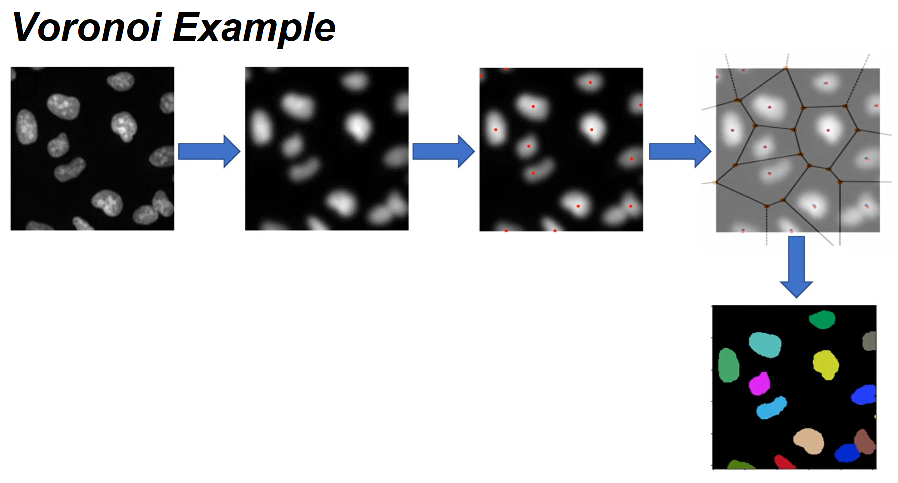


**How can Voronoi help with image segmentation?**


*   We can find object centers and use them as seeds for Voronoi.
*   Then threshold objects withing each voronoi region.


**Workflow:**


1.   Gaussian blur the image and detect maxima for each nuclei.
2.   Threshold the input image after applying light gaussian blur (sigma=1).
3.   Exclude maxima locations from the background, to make sure we only include the ones from nuclei.
4.   Separate maxima locations into labels using masked voronoi.
5.   Separate objects using watershed (wont always work).

In [ ]:
# import libs
from skimage import io, filters
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt

# read an image
img = io.imread('image_path', as_gray = True)


In [ ]:
# Step 1 - Gaussian blur to average local intensity variations (it will help out locate the cells in the image)
img_blurred = filters.gaussian(img, sigma=5)
plt.imshow(img_blurred, cmap='gray')

In [ ]:
# Step 2: Find the points representing each object, to be used for Voronoi
from skimage.feature import peak_local_max
coordinates = peak_local_max(img, min_distance=20, 
                             exclude_border=False)

# Plot y versus x as markers
# 'r.' draws the x,y as red points
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.') 

In [ ]:
# Step 3: Voronoi regions - we'll use the above points as seeds
vor3 = Voronoi(coordinates) # our Voronoi diagram based on the seeds
fig3 = voronoi_plot_2d(vor3) # creating a figure from the Voronoi diagram, so we can plot it
plt.show() # it will show fig3

#### Using pyclesperanto package to segment based on Voronoi+Otsu

In [ ]:
# first install the lib
!pip install pyclesperanto-prototype

# For installation instructions of the pyclesperanto package, 
# https://github.com/clEsperanto/pyclesperanto_prototype

In [ ]:
# import libs
from matplotlib import pyplot as plt
import pyclesperanto_prototype as cle
from skimage import io

# read an image
img = io.imread('image_path', as_gray = True)


In [ ]:
# preparing our GPU

# list names of all available GPU-devices
print("Available devices:" + str(cle.available_device_names()))

Available devices:['Tesla T4', 'cupy backend (experimental)']


In [ ]:
# select a specific GPU device from the above
device = cle.select_device('Tesla T4')
print("Used GPU: ", device)

#Push the image to gpu memory
img_gpu = cle.push(img)

In [ ]:
# Step 1: heavy gaussian blur the image (e.g., sigma=12) and detect maxima for each nuclei
# heavy gaussian blurring assists in detecting maxima that reflects the objects.
# If objects are closer, you may want to decrease the amount of blurring.
img_gaussian = cle.gaussian_blur(img, sigma_x=3, sigma_y=3, sigma_z=3)
plt.imshow(img_gaussian, cmap='gray')

In [ ]:
# Find out the maxima locations for each 'blob'

img_maxima_locations = cle.detect_maxima_box(img_gaussian, radius_x=12, radius_y=12, radius_z=12)

In [ ]:
# Step 2: Applying another (light) gaussian blur (sigma=1), to otsu threshold the input image
img_gaussian2 = cle.gaussian_blur(img, sigma_x=1, sigma_y=1, sigma_z=1)
img_thresh = cle.threshold_otsu(img_gaussian2) # thresholding using otsu with cle

In [ ]:
# Step 3: Exclude maxima locations from the background, to make sure we only include the ones from nuclei

# We take the binary spots image and the binary segmentation image 
# and apply a binary_and operation to exclude spots which were detected in the background area. 
# Those likely corresponded to noise.
img_relevant_maxima = cle.binary_and(img_thresh, img_maxima_locations)

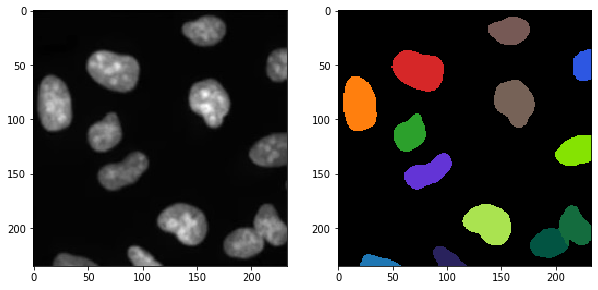

In [ ]:
# Step 4: Separate maxima locations into labels using masked voronoi

# Creates a mask within every Voronoi region
voronoi_separation = cle.masked_voronoi_labeling(img_relevant_maxima, img_thresh)

# Display
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
cle.imshow(img, plot=axs[0], color_map='gray')
cle.imshow(voronoi_separation, labels=True, plot=axs[1])


In [ ]:
# In order to save images from cle, you must save them as a tif file:
io.imsave(f'{images_path}/img.tif', img_thresh)

#### **Using pyclesperanto package to segment based on Voronoi+Otsu - SHORT**

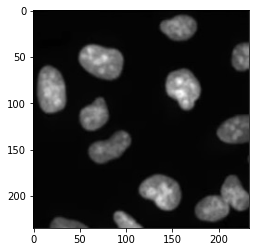

In [ ]:
# otsu + vor + labeling


from matplotlib import pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle
from skimage import exposure, img_as_ubyte

#Read the input image
# read an image of cells
img = io.imread('img_path', as_gray = True)

#Normalize then scale to 255 and convert to uint8 - using skimage
cells_8bit = img_as_ubyte(img)


In [ ]:
# preparing our GPU

# list names of all available GPU-devices
print("Available devices:" + str(cle.available_device_names()))

Available devices:['Tesla T4', 'cupy backend (experimental)']


In [ ]:
# select a specific GPU device from the above
device = cle.select_device('Tesla T4')
print("Used GPU: ", device)

#Push the image to gpu memory
cells_gpu = cle.push(cells_8bit)

In [ ]:
############ voronoi_otsu_labeling library ##################
# voronoi_otsu_labeling(image, spot_sigma=some_number, outline_sigma=another_number)
#spot_sigma= depends on how close the detected objects can be. Low number may divide large objects into multiple objects.
#outline_sigma = how precise the outline needs to be for the segmented objects (use a low number)
segmented = cle.voronoi_otsu_labeling(cells_gpu, spot_sigma=5, 
                                      outline_sigma=1)
cle.imshow(segmented, labels=True)

In [ ]:
# Remove edge touching objects
segmented_excl_edges = cle.exclude_labels_on_edges(segmented)
cle.imshow(segmented_excl_edges, labels=True)

In [ ]:
# Number of objects segmented
# The maxmium intensity in a label image corresponds to the number of objects
num_objects = cle.maximum_of_all_pixels(segmented_excl_edges)
print("Total objects detected are: ", num_objects)

Total objects detected are:  8.0


In [ ]:
# Save segmented image to disk
# save image to disk
import skimage.io
img_segmented_32bit_np = cle.pull(segmented_excl_edges) # pulls img from cle, convert to 32bit np array. each object has a diff int value
plt.imshow(img_segmented_32bit_np)  

io.imsave("result.tif", img_segmented_32bit_np)  # must save as tif

### **Image segmentation using K-Means**

K-Means clustering is an unsupervised machine learning algorithm that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest mean. A cluster refers to a collection of data points aggregated together because of certain similarities. For image segmentation, clusters here are different image colors/values.

Click [here](https://qr.ae/pr7PZM) to read about what's the difference between Voronoi and K-means.

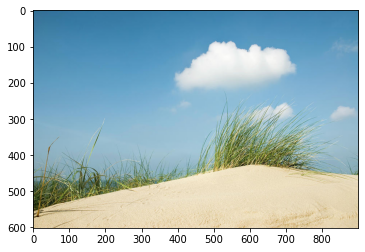

In [ ]:
import numpy as np
import cv2


# read an image of pebbles
img = io.imread(f'{images_path}/img.jpg', as_gray = False)

We going to use the cv2.kmeans() function, which takes a 2D array as input, and since our original image is 3D (width, height, and depth of 3 RGB values), we need to flatten the height and width into a single vector of pixels (3 RGB values):

In [ ]:
# Convert MxNx3 image into Kx3 where K=MxN
pixel_values  = img.reshape((-1,3))  #-1 reshape means, in this case MxN

#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
pixel_values = np.float32(pixel_values)

**Define criteria, number of clusters and apply k-means:**
We are going to stop the algorithm either when some number of iterations is exceeded (say 100), or if the clusters move less than some epsilon value (let's pick 0.2 here).

When this criterion is satisfied, the algorithm iteration stops. 
* cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
* cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
* cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.

The below code defines the stopping criteria in OpenCV:

In [ ]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

If you look at the image, there are four primary colors. As a result, we going to use 4 clusters for this image:

In [ ]:
# number of clusters (K)
k = 10

labels array is the cluster label for each pixel which is either 0, 1, or 2, etc.., centers refer to the center points (each centroid's value).

cv2.KMEANS_RANDOM_CENTERS just indicates OpenCV to randomly assign the values of the clusters initially.

attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

In [ ]:
attempts = 10
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

We converted the flattened image pixel values to floats; we did that because cv2.kmeans() expects that, let's convert them back to 8-bit pixel values:

In [ ]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

Now let's construct the segmented image:

In [ ]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

Converting back to the original image shape and showing it:

In [ ]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

Great! We can also disable some clusters in the image.

In [ ]:
# we take a look at the centers of the diff objects
print(centers)


[[106 122  77]
 [165 173 127]
 [232 217 184]
 [223 229 231]
 [148 186 206]
 [ 56  68  22]
 [104 161 195]
 [ 69 135 176]]


In [ ]:
# lets get the index of the grass row 

for i,center in enumerate(centers):
  if np.all(center == ([90,103,55])):
    grass_center_index = i
    print(grass_center_index)

In [ ]:
# copy source img
masked_image = img.copy()

# convert to the shape of a vector of pixel values (like suits for kmeans)
masked_image = masked_image.reshape((-1, 3))

# color (i.e cluster) to exclude
list_of_cluster_numbers_to_exclude = list(range(k)) # create a list that has the number from 0 to k-1
list_of_cluster_numbers_to_exclude.remove(grass_center_index) # remove the cluster of grass that we want to keep, and not black out
for cluster in list_of_cluster_numbers_to_exclude:
  masked_image[labels== cluster] = [0, 0, 0] # black all clusters except cluster grass_center_index

# convert back to original shape
masked_image = masked_image.reshape(img.shape)

# show the image
plt.imshow(masked_image)

In [ ]:
# detect contours in an image and grab the largest one — this contour will represent the outline/boundary of a given object in the image.
gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY) # color to gray
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1] # threshold the gray
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # find the boundaries 
cnts = imutils.grab_contours(cnts) 
c = max(cnts, key=cv2.contourArea)

# draw the contours enclosing the object
cv2.drawContours(img, cnts, -1, (0,255,0), 1) # draw the counters

# calc number of pixels within the object and append to list
area = cv2.contourArea(c)
print(f'Object has an area = ', area, 'pixels')

plt.imshow(img, cmap='Greens')

In [ ]:
# show the image with area
plt.imshow(masked_image)
plt.title(f'Segmented object area: {area} pixels')

Now let's try to segment our clouds:

In [ ]:
# we take a look at the centers of the diff objects
print(centers)

# from trial and error, I found that the row ([229,219,193]) is the clouds!

In [ ]:
# lets get the index of the clouds row 

for i,center in enumerate(centers):
  if np.all(center == ([225, 231, 232])):
    clouds_center_index = i
    print(clouds_center_index)

9


In [ ]:
# copy source img
masked_image = img.copy()

# convert to the shape of a vector of pixel values (like suits for kmeans)
masked_image = masked_image.reshape((-1, 3))

# color (i.e cluster) to exclude
list_of_cluster_numbers_to_exclude = list(range(k)) # create a list that has the number from 0 to k-1
list_of_cluster_numbers_to_exclude.remove(clouds_center_index) # remove the cluster of clouds that we want to keep, and not black out
for cluster in list_of_cluster_numbers_to_exclude:
  masked_image[labels== cluster] = [0, 0, 0] # black all clusters except the clouds cluster

# convert back to original shape
masked_image = masked_image.reshape(img.shape)

# show the image
plt.imshow(masked_image)

calculate an area when area of pixel known.



In [ ]:
# your code goes here
#find the area in pixels:
gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY) # color to gray
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1] # threshold the gray
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # find the boundaries 
cnts = imutils.grab_contours(cnts) 
c = max(cnts, key=cv2.contourArea)

# calc number of pixels within the object and append to list
area = cv2.contourArea(c)
print(f'Object has an area = ', area, 'pixels')
print(f'Object has an area = ', area*5, '[m^2]')

####Function for Kmeans

In [ ]:
# function to segment using k-means

def segment_image_kmeans(img, k=3, attempts=10): 

    # Convert MxNx3 image into Kx3 where K=MxN
    pixel_values  = img.reshape((-1,3))  #-1 reshape means, in this case MxN

    #We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
    pixel_values = np.float32(pixel_values)

    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    
    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()
    
    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]
    
    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(img.shape)
    
    return segmented_image, labels, centers

# Interacting with user

### Colab Forms

Forms provide an easy way to parameterize code. From a code cell, select **Insert → Add form field**.  When you change the value in a form, the corresponding value in the code will change. 

In [ ]:
#@title String fields

text = 'omer' #@param {type:"string"}
dropdown = '2nd option' #@param ["1st option", "2nd option", "3rd option"]
text_and_dropdown = 'setste' #@param ["1st option", "2nd option", "3rd option"] {allow-input: true}

print(text)
print(dropdown)
print(text_and_dropdown)

omer
2nd option
setste


In [ ]:
#@title Date fields
date_input = '2018-03-04' #@param {type:"date"}

print(date_input)

2018-03-04


In [ ]:
#@title Number fields
number_input = 10.0 #@param {type:"number"}
number_slider = -1 #@param {type:"slider", min:-1, max:1, step:0.1}

integer_input = 10 #@param {type:"integer"}
integer_slider = 27 #@param {type:"slider", min:0, max:100, step:1}

print(number_input)
print(number_slider)

print(integer_input)
print(integer_slider)

10.0
-1
10
27


**Hiding code**

You can change the view of the form by selecting **View → Show/hide code** or using the toolbar above the selected code cell. You can see both code and the form, just the form, or just the code.

In [ ]:
#@title Click `Show code` in the code cell. { display-mode: "form" }

option1 = 'A' #@param ["A", "B", "C"]
print('You selected', option1)

### **Uploading files or images**

You can ask the user to upload files through a browse button, using google.colab.files.upload()

In [ ]:
#@title UPLOAD IMAGES HERE: RUN ME.  { display-mode: "form" }
from google.colab import files

try:
  uploaded = files.upload()
except:
  print("")
  print("Please use Chrome, and enable cookies!")
  print("cookie אנא היכנסו דרך דפדפן כרום במחשב, והפעילו גישה לקבצי ")

# lets the user upload the file, and stores the file name in 'file_names'. The files are uploaded under /content/FILE_NAME
file_names = uploaded.keys() 

In [ ]:
!pwd

/content


As mentioned, the files are uploaded to the folder /content/. You should transfer them to your working folder if needed using shutil.move().

You can use files.download(path_to_file) to download the file to the users computer.

In [ ]:
# lets convert our file names into a list of of file names
list_file_paths = list(file_names)
list_file_paths

['Oak_Tree.jpg']

In [ ]:
#@title Downloading files: Example, downloading the first uploaded file above. RUN ME!  { display-mode: "form" }
files.download(list_file_paths[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#import your python file as a module


Find out my working directory:

In [ ]:
!pwd # ! interacts with the operating system

/content


Change my working directory:

In [ ]:
%cd /content/drive

[Errno 2] No such file or directory: '/content/drive'
/content


Lets mount our drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now let's change our dir to /content/drive:

In [ ]:
%cd /content/drive
!pwd

/content/drive
/content/drive


In [ ]:
%cd /content/drive/MyDrive/71254_2023/01_Lectures/Class06/scripts

/content/drive/.shortcut-targets-by-id/1YejzZF4yTd-VII_OgL9a-frHMMMIsjAy/71254_2023/01_Lectures/Class06/scripts


Let's just make sure that it worked:

In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1YejzZF4yTd-VII_OgL9a-frHMMMIsjAy/71254_2023/01_Lectures/Class06/scripts'

**Amazing! You can now create .py files with useful codes you wrote, upload them to your Drive or GitHub, and import them as module in order to use them frequently.**

**Example** how to clone a GitHub Repository:

In [ ]:
%cd /content/
!git clone https://github.com/giswqs/GEE-Courses.git

/content
Cloning into 'GEE-Courses'...
^C


#Calulate an area with AruCo

In [ ]:
# segment using kmeans
image =io.imread(f'{folder_path}/images/tomato.jpg')
k=3
attempts=10
segmented_kmeans, labels, centers = segment_image_kmeans(image, k, attempts)
plt.imshow(segmented_kmeans)

In [ ]:
print(centers)

[[133 165  26]
 [ 15  22   1]
 [255 255 255]]


In [ ]:
# lets get the index of the grass row 

for i,center in enumerate(centers):
  if np.all(center == ([133,165,26])):
    leaf_center_index = i
    print(leaf_center_index)

0


In [ ]:
# copy source img
img = image.copy()
masked_image = img.copy()

# convert to the shape of a vector of pixel values (like suits for kmeans)
masked_image = masked_image.reshape((-1, 3))

index_to_remove = leaf_center_index

# color (i.e cluster) to exclude
list_of_cluster_numbers_to_exclude = list(range(k)) # create a list that has the number from 0 to k-1
list_of_cluster_numbers_to_exclude.remove(index_to_remove) # remove the cluster of leaf that we want to keep, and not black out
for cluster in list_of_cluster_numbers_to_exclude:
  masked_image[labels== cluster] = [0, 0, 0] # black all clusters except cluster leaf_center_index

# convert back to original shape
masked_image = masked_image.reshape(img.shape)
masked_image_grayscale = rgb2gray(masked_image)

# show the image
plt.imshow(masked_image_grayscale, cmap="Greens")
plt.colorbar()

Now let's apply the ratio that we've got from the AruCo marker to calculate the plant's area:

In [ ]:
# count how many pixels are in the foreground and bg
leaf_count = np.sum(np.array(masked_image_grayscale) >0)
bg_count = np.sum(np.array(masked_image_grayscale) ==0)

print('Leaf px count:', leaf_count, 'px')
print('Area:', leaf_count*pixel_cm_ratio, 'cm\N{SUPERSCRIPT TWO},', 'which is:',  f'{0.0001*leaf_count*pixel_cm_ratio:.3f}', 'm\N{SUPERSCRIPT TWO}')

Leaf px count: 1223373 px
Area: 383.233403503496 cm², which is: 0.038 m²


#Remote sensing from satellite

In [ ]:
!pip install geemap

### Run me first

Run the following cell to initialize the Earth Engine API. The output will contain instructions on how to grant this notebook access to Earth Engine using your account.

In [ ]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

In [ ]:
#Important libs:
import geemap
import pandas as pd
from IPython.display import Image
import ee, datetime
from pylab import *
from matplotlib.pylab import rcParams

##Load different images from satellites:

In [ ]:
# Load an image of LANDSAT 8 RGB
map1 = geemap.Map()
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318')
# Center the map and display the image.
map1.centerObject(image, zoom=8)
vis_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0.0,
    'max': 3000,
    'opacity': 1.0,
    'gamma': 1.2,
}
map1.addLayer(image, vis_params, "Landsat Vis")
map1

###NDVI:

In [ ]:
# Load a Landsat 8 image-do NDVI
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')
# Compute the NDVI using an expression.
NDVI = image.expression(
    ' ((NIR - RED) / (NIR + RED))', {
      'NIR': image.select('B5'),
      'RED': image.select('B4'),
}).rename('NDVI');
palette =  ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']
map1.centerObject(image, 9)
map1.addLayer(NDVI, {'min': 0, 'max': 1, 'palette':palette}, 'NDVI')
map1

###NDWI:

In [ ]:
#https://medium.com/@melqkiades/water-detection-using-ndwi-on-google-earth-engine-2919a9bf1951
#https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/ndwi/
NDWI = se2.normalizedDifference([ 'B3','B8',]).rename('NDWI')
palette =  ['red', 'yellow', 'green', 'cyan', 'blue']
map1.centerObject(se2, 9)
map1.addLayer(NDWI, {'min': -1, 'max': 1, 'palette':palette}, 'NDWI')
map1

In [ ]:
#https://medium.com/@melqkiades/water-detection-using-ndwi-on-google-earth-engine-2919a9bf1951
#https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/ndwi/
NDWI = se2.normalizedDifference([ 'B3','B8',]).rename('NDWI')
NDWIThreshold = NDWI.gte(0.0);
NDWIMask = NDWIThreshold.updateMask(NDWIThreshold);
palette =  ['blue']
map1.centerObject(se2, 9)
map1.addLayer(NDWIMask,  {'min': 0, 'max': 1, 'palette':palette}, 'NDWI MASK')
map1

###Sat image of Israel (or any other region):

In [ ]:
# sentinel 2 image israel
AOI = ee.Geometry.Point(35.054342198020024, 31.35047863722117)
se2 = ee.ImageCollection('COPERNICUS/S2').filterDate("2019-01-01","2019-12-31").filterBounds(AOI).first()
# set some thresholds
rgb = ['B4','B3','B2']
# set some thresholds
rgbViz = {"min":0.0, "max":3000,"bands":rgb}
# initialize our map
     

# initialize our map
map1 = geemap.Map()
map1.centerObject(AOI, 7)
map1.addLayer(se2, rgbViz, "S2")
map1.addLayerControl()
map1

###More specific place:

In [ ]:
# get December image, we're using the "avg_rad" band

#se2 = ee.ImageCollection('COPERNICUS/S2').filterDate("2020-05-01","2022-12-31").filterBounds(geometry)#.first()
my_boundary = ee.Geometry.Polygon([ [[35.13008776970655, 31.288173501430748],[35.13008776970655, 31.261764527107875],[35.16304675408155, 31.261764527107875],[35.16304675408155, 31.288173501430748]]] ,proj=None)
#fc = ee.FeatureCollection([ee.Feature(ee.Geometry.Polygon([[-109.05, 41], [-109.05, 37], [-102.05, 37], [-102.05, 41])
#viirs2017_12 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2017-12-01","2017-12-31").select('avg_rad').first()
#polygon2 = ee.Geometry.Polygon([
#  [[-122.06197,37.04748], [-122.1830,37.4748], [-122.1830,37.8032], [-122.6197,37.8032], [-122.061974,37.047484]]]);
tls = ee.Feature(ee.FeatureCollection(my_boundary).geometry())

NDVI_clip = NDVI.clip(tls)
map1 = geemap.Map()
map1.centerObject(NDVI_clip, zoom=8)
map1.add_basemap('SATELLITE')
#map1.addLayer(X.select('NDVI'), {})
map1.addLayer(NDVI_clip.select('NDVI'), {'min': 0, 'max': 1, 'palette':palette}, 'NDVI')
#Map.addLayer(X, {'min': 0, 'max': 1, 'palette':palette}, 'NDVI')
map1.addLayerControl()
map1

##Export an image:

In [ ]:
# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(**{
    'image': NDVI_clip,
    'description': 'imageToDriveExample',
    'folder':'Example_folder',
    'scale': 10,
    'region': my_boundary.getInfo()['coordinates']
})
task.start()

###Delete a map:

In [ ]:
del(map1)

##Import Sat images with rasterio

In [ ]:
!pip install rasterio

In [ ]:
import rasterio
dataset = rasterio.open('/content/imageToDriveExample.tif')

In [ ]:
dataset.crs
dataset.profile
from rasterio.plot import show
show(dataset)

##More data on an image:

In [ ]:
import geemap.colormaps as cm

###Elavation:

In [ ]:
#more data not satiile image
map1 = geemap.Map()
palette = cm.palettes.dem
# palette = cm.palettes.terrain
dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {'min': 0, 'max': 4000, 'palette': palette}
map1.addLayer(dem, vis_params, 'SRTM DEM')
map1.add_colorbar(vis_params, label="Elevation (m)", layer_name="SRTM DEM")
map1

###precipitation

In [ ]:
#not sure we need
import geemap.colormaps as cm
map1 = geemap.Map()
palette = cm.palettes.ocean_r
# palette = cm.palettes.terrain
dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD').filter(ee.Filter.date('2018-05-01', '2018-05-05'))  
#dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD').filter(ee.Filter.date('2018-01-01', '2019-01-01')).max()#we can also do sum (:  
precipitation = dataset.select('precipitation')#.first()
vis_params = {'min': 0, 'max': 1072, 'palette': palette}
map1.addLayer(precipitation, vis_params, 'palette')
map1.add_colorbar(vis_params, label="precipitation (mm/pentad)", layer_name="precipitation")

map1

#Image Analysis using using Pre-trained Machine Learning Models 

## Random Forest Classifier (trainable)



A pixel-based segmentation is computed here using local features based on local intensity, edges and textures at different scales. A user-provided mask is used to identify different regions. The pixels of the mask are used to train a random-forest classifier 1 from scikit-learn. Unlabeled pixels are then labeled from the prediction of the classifier.

Source: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_trainable_segmentation.html

## Interactive Machine Learning
Image segmentation



## Image Classification with TensorFlow Hub

In this colab, you'll try multiple image classification models from TensorFlow Hub and decide which one is best for your use case.

Because TF Hub encourages a [consistent input convention](https://www.tensorflow.org/hub/common_saved_model_apis/images#image_input) for models that operate on images, it's easy to experiment with different architectures to find the one that best fits your needs.

In [ ]:
#import libs

import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Helper functions for loading image (hidden)

original_image_cache = {}

def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)
  return image

def load_image_from_url(img_url):
  """Returns an image with shape [1, height, width, num_channels]."""
  user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
  response = requests.get(img_url, headers=user_agent)
  image = Image.open(BytesIO(response.content))
  image = preprocess_image(image)
  return image

def load_image(image_url, image_size=256, dynamic_size=False, max_dynamic_size=512):
  """Loads and preprocesses images."""
  # Cache image file locally.
  if image_url in original_image_cache:
    img = original_image_cache[image_url]
  elif image_url.startswith('https://'):
    img = load_image_from_url(image_url)
  else:
    fd = tf.io.gfile.GFile(image_url, 'rb')
    img = preprocess_image(Image.open(fd))
  original_image_cache[image_url] = img
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img_raw = img
  if tf.reduce_max(img) > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  if not dynamic_size:
    img = tf.image.resize_with_pad(img, image_size, image_size)
  elif img.shape[1] > max_dynamic_size or img.shape[2] > max_dynamic_size:
    img = tf.image.resize_with_pad(img, max_dynamic_size, max_dynamic_size)
  return img, img_raw

def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

Select an Image Classification Model. After that, some internal variables are set and the labels file is downloaded and prepared for use.

There are some technical differences between the models, like different input size, model size, accuracy, and inference time. Here you can change the model you are using until you find the one most suitable for your use case.

The handle (url) of the model is printed for your convenience. More documentation about each model is available there.

Note: All these models were trained on the ImageNet dataset

In [ ]:
#@title Select an Image Classification model

image_size = 224
dynamic_size = False

model_name = "resnet_v2_152" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/classification/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/classification/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/classification/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/classification/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/classification/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/classification/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/classification/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/classification/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/classification/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/classification/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/classification/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/classification/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/classification/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/classification/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/classification/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/classification/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/classification/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/classification/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/classification/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/classification/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/classification/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/classification/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/classification/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/classification/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/classification/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/ilsvrc2012_classification/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/classification/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/classification/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/classification/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/classification/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/classification/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/classification/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/classification/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/classification/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/classification/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "mobilenet_v2_100_224": 224,
  "mobilenet_v2_130_224": 224,
  "mobilenet_v2_140_224": 224,
  "nasnet_large": 331,
  "nasnet_mobile": 224,
  "pnasnet_large": 331,
  "resnet_v1_50": 224,
  "resnet_v1_101": 224,
  "resnet_v1_152": 224,
  "resnet_v2_50": 224,
  "resnet_v2_101": 224,
  "resnet_v2_152": 224,
  "mobilenet_v3_small_100_224": 224,
  "mobilenet_v3_small_075_224": 224,
  "mobilenet_v3_large_100_224": 224,
  "mobilenet_v3_large_075_224": 224,
}

model_handle = model_handle_map[model_name]

print(f"Selected model: {model_name} : {model_handle}")


max_dynamic_size = 512
if model_name in model_image_size_map:
  image_size = model_image_size_map[model_name]
  dynamic_size = False
  print(f"Images will be converted to {image_size}x{image_size}")
else:
  dynamic_size = True
  print(f"Images will be capped to a max size of {max_dynamic_size}x{max_dynamic_size}")

labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

#download labels and creates a maps
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]


Selected model: resnet_v2_152 : https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4
Images will be converted to 224x224
10484/10484 [==============================] - 0s 0us/step


You can select one of the images below, or use your own image. Just remember that the input size for the models vary and some of them use a dynamic input size (enabling inference on the unscaled image). Given that, the method `load_image` will already rescale the image to the expected format.

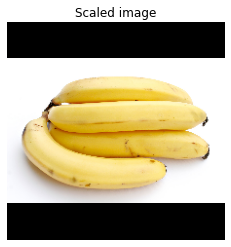

In [ ]:
#@title Select an Input Image

image_name = "banana" # @param ['tiger', 'bus', 'car', 'cat', 'dog', 'apple', 'banana', 'turtle', 'flamingo', 'piano', 'honeycomb', 'teapot']

images_for_test_map = {
    "tiger": "https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg",
    #by Charles James Sharp, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
    "bus": "https://upload.wikimedia.org/wikipedia/commons/6/63/LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg",
    #by Martin49 from London, England, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons
    "car": "https://upload.wikimedia.org/wikipedia/commons/4/49/2013-2016_Toyota_Corolla_%28ZRE172R%29_SX_sedan_%282018-09-17%29_01.jpg",
    #by EurovisionNim, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
    "cat": "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg",
    #by Alvesgaspar, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "dog": "https://upload.wikimedia.org/wikipedia/commons/archive/a/a9/20090914031557%21Saluki_dog_breed.jpg",
    #by Craig Pemberton, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "apple": "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg",
    #by Abhijit Tembhekar from Mumbai, India, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons
    "banana": "https://upload.wikimedia.org/wikipedia/commons/1/1c/Bananas_white_background.jpg",
    #by fir0002  flagstaffotos [at] gmail.com		Canon 20D + Tamron 28-75mm f/2.8, GFDL 1.2 <http://www.gnu.org/licenses/old-licenses/fdl-1.2.html>, via Wikimedia Commons
    "turtle": "https://upload.wikimedia.org/wikipedia/commons/8/80/Turtle_golfina_escobilla_oaxaca_mexico_claudio_giovenzana_2010.jpg",
    #by Claudio Giovenzana, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "flamingo": "https://upload.wikimedia.org/wikipedia/commons/b/b8/James_Flamingos_MC.jpg",
    #by Christian Mehlführer, User:Chmehl, CC BY 3.0 <https://creativecommons.org/licenses/by/3.0>, via Wikimedia Commons
    "piano": "https://upload.wikimedia.org/wikipedia/commons/d/da/Steinway_%26_Sons_upright_piano%2C_model_K-132%2C_manufactured_at_Steinway%27s_factory_in_Hamburg%2C_Germany.png",
    #by "Photo: © Copyright Steinway & Sons", CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "honeycomb": "https://upload.wikimedia.org/wikipedia/commons/f/f7/Honey_comb.jpg",
    #by Merdal, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons
    "teapot": "https://upload.wikimedia.org/wikipedia/commons/4/44/Black_tea_pot_cropped.jpg",
    #by Mendhak, CC BY-SA 2.0 <https://creativecommons.org/licenses/by-sa/2.0>, via Wikimedia Commons
}

img_url = images_for_test_map[image_name]
image, original_image = load_image(img_url, image_size, dynamic_size, max_dynamic_size)
show_image(image, 'Scaled image')

Now that the model was chosen, loading it with TensorFlow Hub is simple.

This also calls the model with a random input as a "warmup" run. Subsequent calls are often much faster, and you can compare this with the latency below.

*Note:* models that use a dynamic size might need a fresh "warmup" run for each image size.

In [ ]:
classifier = hub.load(model_handle)

input_shape = image.shape
warmup_input = tf.random.uniform(input_shape, 0, 1.0)
%time warmup_logits = classifier(warmup_input).numpy()

CPU times: user 3.3 s, sys: 683 ms, total: 3.98 s
Wall time: 8.05 s


Everything is ready for inference. Here you can see the top 5 results from the model for the selected image.

CPU times: user 26.1 ms, sys: 42 µs, total: 26.2 ms
Wall time: 31.8 ms
(1)  955 - banana: 1.0
(2)  779 - scale: 7.992481595173531e-14
(3)  951 - orange: 4.3900311581497944e-14
(4)  935 - hotdog: 1.1280942339660961e-14
(5)  940 - zucchini: 1.5235096695900797e-15


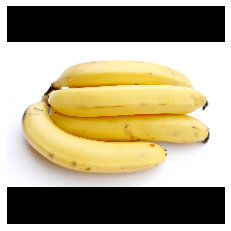

In [ ]:
# Run model on image
%time probabilities = tf.nn.softmax(classifier(image)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

# Some models include an additional 'background' class in the predictions, so
# we must account for this when reading the class labels.
includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

show_image(image, '')

## Object detection

In [ ]:
# let's first restart our runtime, since we're going to use a different model (only for class/teaching perposes)
import os
os.kill(os.getpid(), 9)

This example loads a pretrained YOLOv5s model and passes an image for inference. YOLOv5 accepts URL, Filename, PIL, OpenCV, Numpy and PyTorch inputs, and returns detections in torch, pandas, and JSON output formats.

In [ ]:
# instll the dependencies
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

In [ ]:
# load the model
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-5 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
# libs
from google.colab import files
from matplotlib import pyplot as plt
from skimage import io

# upload an image - you can try 'citrus.jpg' from /Class10/images
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = io.imread(img_path)
plt.imshow(img)

Saving citrus.jpg to citrus.jpg


In [ ]:
# List of links to images
#imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(img) # accepts URL, Filename, PIL, OpenCV, Numpy..

# Results
#results.print()
results.show()  # or .save()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)



In [ ]:
# if you want, you can load an image to the model from a url, like from a image on a public google drive
file_id = '1xDbIZ7oJkdid5c7-NtFAIGEi-zSmaUFL'
gdrive_url = f'https://drive.google.com/u/1/uc?id={file_id}&export=download'

# Inference
results = model(gdrive_url)

# Results
results.show()

In [ ]:
# check if any people were detected in the image
if 'person' in results.pandas().xyxy[0]['name'].values:
  print('Person detected in image!')
else:
  print('No people detected in image.')

## Mask Rcnn

[Source](https://colab.research.google.com/drive/1e05Hw_21zl2SgcJ2clE2mWJ1wcoMXUp4)

### Preps
TF 2.9.2 -> 2.5.0

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
!pip install -U -qq tensorflow==2.5.0
exit() # Runtime restart required!

--2022-12-28 12:58:46--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   314MB/s    in 1.3s    

2022-12-28 12:58:47 (314 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’ saved [430460776/430460776]

dpkg: warning: downgrading libcudnn8 from 8.1.1.33-1+cuda11.2 to 8.1.0.77-1+cuda11.2
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.1.33-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+c

In [ ]:
# Notice how the TF version is now 2.5.0
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
# let's make sure we have a GPU, under device_type
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2365396977775188671, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14474280960
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6726221188381351372
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
# our GPU card is probably Tesla T4 (what we get from Google)
!nvidia-smi

Wed Dec 28 13:02:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |    256MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Creating our dataset

Use https://www.makesense.ai/ for annotation. 
1. Upload plenty of images (you can get them from Google Images) for training, and label them there. Select them with polygons exactly.
2. When finished all images and labels, click on "Actions", and "Export Annotations".
3. Choose "Single file in COCO JSON format". and then "Export". 
4. Call it "train.json".
5. Do steps 1-4, for around 30% of images, and download a file called "val.json".
6. Create a folder called "dataset", the contents should look like this (in the "train" folder you should have at least 20 images, and in your "val" folder you should have at least 10 images:



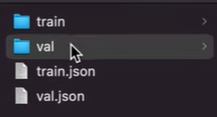

7. Save it in your Google Drive, and download it using gdown, or call it with it's path.

**Annotation example using makesense.ai**

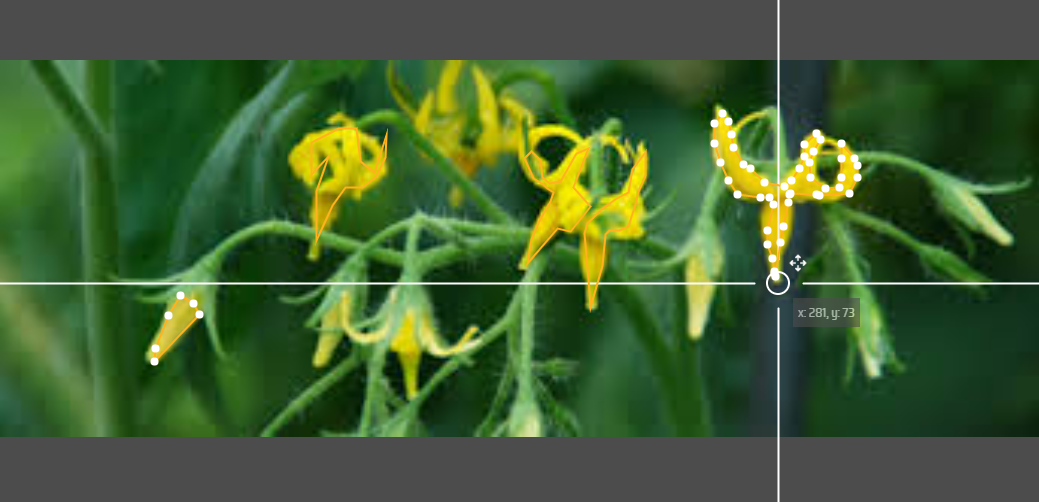

In [ ]:
# batch rename files script
# use it, if you downloaded a lot of images from google, and you want to rename them from img0 to img100 for example

# Python 3 code to rename multiple
# files in a directory or folder

# importing os module
import os

# Function to rename multiple files
def main():

	folder = "/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn/dataset/test"
	for count, filename in enumerate(os.listdir(folder)):
		dst = f"image{str(count)}.jpg"
		src =f"{folder}/{filename}" # foldername/filename, if .py file is outside folder
		dst =f"{folder}/{dst}"
		
		# rename() function will
		# rename all the files
		os.rename(src, dst)

# Driver Code
if __name__ == '__main__':
	
	# Calling main() function
	main()


In [ ]:
# cloning the MASK-RCNN repo
!git clone https://github.com/kairess/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1543, done.
remote: Counting objects: 100% (565/565), done.
remote: Compressing objects: 100% (552/552), done.
remote: Total 1543 (delta 20), reused 554 (delta 13), pack-reused 978
Receiving objects: 100% (1543/1543), 1.26 GiB | 17.52 MiB/s, done.
Resolving deltas: 100% (590/590), done.
Checking out files: 100% (624/624), done.


In [ ]:
!git clone https://github.com/deedeeharris/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
# import libs
import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

ROOT_DIR = 'Mask_RCNN'

sys.path.append(ROOT_DIR) 
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib

In [ ]:
# Download the pretrained model
# This will default to sub-directories in your mask_rcnn_dir, but if you want them somewhere else, updated it here.

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


### Configuration

- NAME: weights, tensorboard (Save folder name)
- IMAGES_PER_GPU: (batch size)
- LEARNING_RATE
- NUM_CLASSES: Number of classes to learn (requires background +1)

In [ ]:
class TrainConfig(Config):
    # Give the configuration a recognizable name
    NAME = "custom"

    # Train on 1 GPU and 1 image per GPU. Batch size is 1 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 5

    LEARNING_RATE = 0.001

    # Number of classes (including background) - IMPORTANT TO CHANGE ACCORDING TO YOUR LABELS IN YOUR JSON
    NUM_CLASSES = 1 + 1  # background + 1 (flowers)

    # All of our training images are 1920x1012
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    
    # Matterport originally used resnet101, but I downsized to fit it on my graphics card
    BACKBONE = 'resnet50' # resnet50

    # To be honest, I haven't taken the time to figure out what these do
    RPN_ANCHOR_SCALES = (32, 64, 128, 256, 512)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 50 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 
    
config = TrainConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     5
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 5
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

### Define the dataset

In [ ]:
class CocoLikeDataset(utils.Dataset):
    """ Generates a COCO-like dataset, i.e. an image dataset annotated in the style of the COCO dataset.
        See http://cocodataset.org/#home for more information.
    """
    def load_data(self, annotation_json, images_dir):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """
        # Load json from file
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()
        
        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']
            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(class_name))
                return
            
            self.add_class(source_name, class_id, class_name)
        
        # Get all annotations
        annotations = {}
        for annotation in coco_json['annotations']:
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)
        
        # Get all images and add them to the dataset
        seen_images = {}
        for image in coco_json['images']:
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))
                
                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                image_annotations = annotations[image_id]
                
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )
                
    def load_mask(self, image_id):
        """ Load instance masks for the given image.
        MaskRCNN expects masks in the form of a bitmap [height, width, instances].
        Args:
            image_id: The id of the image to load masks for
        Returns:
            masks: A bool array of shape [height, width, instance count] with
                one mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        annotations = image_info['annotations']
        instance_masks = []
        class_ids = []
        
        for annotation in annotations:
            class_id = annotation['category_id']
            mask = Image.new('1', (image_info['width'], image_info['height']))
            mask_draw = ImageDraw.ImageDraw(mask, '1')
            for segmentation in annotation['segmentation']:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)

        mask = np.dstack(instance_masks)
        class_ids = np.array(class_ids, dtype=np.int32)
        
        return mask, class_ids

### Create the Training and Validation Datasets
Make sure you download the training dataset linked at the top of this notebook. If you put the dataset somewhere else, update the paths below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train 22
Validation 7


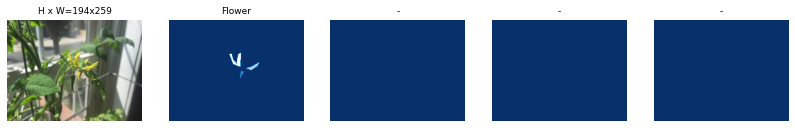

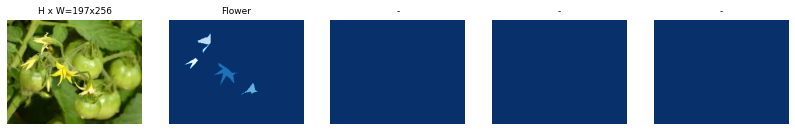

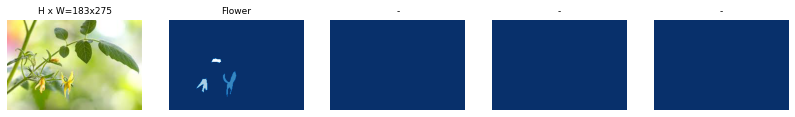

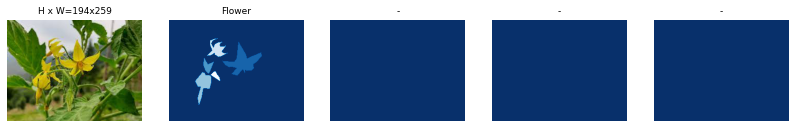

In [ ]:
root_folder = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn'

dataset_train = CocoLikeDataset()
dataset_train.load_data(f'{root_folder}/dataset/train.json', f'{root_folder}/dataset/train/')
dataset_train.prepare()

dataset_val = CocoLikeDataset()
dataset_val.load_data(f'{root_folder}/dataset/val.json', f'{root_folder}/dataset/val/')
dataset_val.prepare()

image_ids = np.random.choice(dataset_train.image_ids, 4)

print('Train', len(dataset_train.image_ids))
print('Validation', len(dataset_val.image_ids))

for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
dataset_train.class_names

['BG', 'Flower']

### Create the Training Model
This code is largely borrowed from the train_shapes.ipynb notebook.

In [ ]:
model = modellib.MaskRCNN(
    mode="training",
    config=config,
    model_dir=MODEL_DIR)

model.load_weights(
    COCO_MODEL_PATH,
    by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

### Training

Train in two stages:

1. Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass layers='heads' to the train() function.

2. Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass layers="all to train all layers.

#### 1. Head Only

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
start_train = time.time()

model.train(
    dataset_train,
    dataset_val, 
    learning_rate=config.LEARNING_RATE, 
    epochs=30, 
    layers='heads')

end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)

print(f'Training took {minutes} minutes')


Starting at epoch 0. LR=0.001

Checkpoint Path: Mask_RCNN/logs/custom20221228T1436/mask_rcnn_custom_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (TimeDistr

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training_8/SGD/gradients/gradients/roi_align_classifier_9/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training_8/SGD/gradients/gradients/roi_align_classifier_9/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training_8/SGD/gradients/gradients/roi_align_classifier_9/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training_8/SGD/gradients/gradients/roi_align_classifier_9/concat_grad/sub_1:0", shape=(None,), dtype=int32), values=Tensor("training_8/SGD/gradients/gradients/roi_align_classifier_9/concat_grad/Gathe

5/5 [==============================] - ETA: 0s - batch: 2.0000 - size: 5.0000 - loss: 3.2386 - rpn_class_loss: 0.2499 - rpn_bbox_loss: 0.5444 - mrcnn_class_loss: 0.9378 - mrcnn_bbox_loss: 0.8197 - mrcnn_mask_loss: 0.6868

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


5/5 [==============================] - 113s 25s/step - batch: 2.0000 - size: 5.0000 - loss: 3.2386 - rpn_class_loss: 0.2499 - rpn_bbox_loss: 0.5444 - mrcnn_class_loss: 0.9378 - mrcnn_bbox_loss: 0.8197 - mrcnn_mask_loss: 0.6868 - val_loss: 2.8559 - val_rpn_class_loss: 0.0739 - val_rpn_bbox_loss: 0.5651 - val_mrcnn_class_loss: 0.8312 - val_mrcnn_bbox_loss: 0.7879 - val_mrcnn_mask_loss: 0.5977
Epoch 2/30
5/5 [==============================] - 6s 1s/step - batch: 2.0000 - size: 5.0000 - loss: 2.4385 - rpn_class_loss: 0.1529 - rpn_bbox_loss: 0.4622 - mrcnn_class_loss: 0.5774 - mrcnn_bbox_loss: 0.6894 - mrcnn_mask_loss: 0.5565 - val_loss: 2.4563 - val_rpn_class_loss: 0.0775 - val_rpn_bbox_loss: 0.5554 - val_mrcnn_class_loss: 0.5500 - val_mrcnn_bbox_loss: 0.7755 - val_mrcnn_mask_loss: 0.4977
Epoch 3/30
5/5 [==============================] - 6s 1s/step - batch: 2.0000 - size: 5.0000 - loss: 2.1155 - rpn_class_loss: 0.1414 - rpn_bbox_loss: 0.4886 - mrcnn_class_loss: 0.3696 - mrcnn_bbox_loss: 0.

#### 2. All layers

Optional

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
start_train = time.time()

model.train(
    dataset_train,
    dataset_val, 
    learning_rate=config.LEARNING_RATE / 10,
    epochs=20, 
    layers="all")

end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)

print(f'Training took {minutes} minutes')


Starting at epoch 15. LR=0.0001

Checkpoint Path: Mask_RCNN/logs/custom20221228T1329/mask_rcnn_custom_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b       

### Save trained model to disk

In [ ]:
# download the trained model to disk

import shutil

original = r'/content/Mask_RCNN/logs/custom20221228T1436/mask_rcnn_custom_0030.h5'
target = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn/mask_rcnn_custom_0030_28122022_flowers.h5'

shutil.copyfile(original, target)

'/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn/mask_rcnn_custom_0030_28122022_flowers.h5'

### Prepare to run Inference

Create a new InferenceConfig, then use it to create a new model.

In [ ]:
# mount drive first
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
class InferenceConfig(TrainConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.65 # CHANGE HERE IF YOU WANT

inference_config = InferenceConfig()

# Recreate the model in inference mode
test_model = modellib.MaskRCNN(
    mode="inference", 
    config=inference_config,
    model_dir=MODEL_DIR)

model_path = test_model.find_last()
print(model_path)

test_model.load_weights(model_path, by_name=True)

Mask_RCNN/logs/custom20221228T1436/mask_rcnn_custom_0030.h5
Re-starting from epoch 30


### Run Inference

In [ ]:
import skimage

mask_colors = [
    (0., 0., 0.), # Background
    (1., 0., 0.), # Red
    (0., 1., 0.)  # Green
]

real_test_dir = f'{root_folder}/dataset/test'
image_paths = []

for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))

for image_path in image_paths:
    img = skimage.io.imread(image_path)
    img_arr = np.array(img)

    results = test_model.detect([img_arr], verbose=1)
    r = results[0]

    colors = tuple(np.take(mask_colors, r['class_ids'], axis=0))

    visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                                dataset_val.class_names, r['scores'], figsize=(16, 8),
                                colors=colors)

### Run on one image

Saving 80[1] to 80[1]


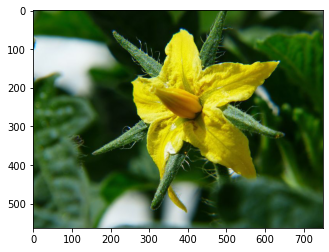

In [ ]:
# libs
from google.colab import files
from matplotlib import pyplot as plt
from skimage import io

# upload an image 
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = io.imread(img_path)
plt.imshow(img)

--2022-12-28 13:48:13--  https://www.seipasa.com/files/images/img_flor-de-tomate.jpg
Resolving www.seipasa.com (www.seipasa.com)... 82.223.49.169
Connecting to www.seipasa.com (www.seipasa.com)|82.223.49.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73449 (72K) [image/jpeg]
Saving to: ‘flower.jpg’

flower.jpg          100%[===================>]  71.73K   320KB/s    in 0.2s    

2022-12-28 13:48:15 (320 KB/s) - ‘flower.jpg’ saved [73449/73449]



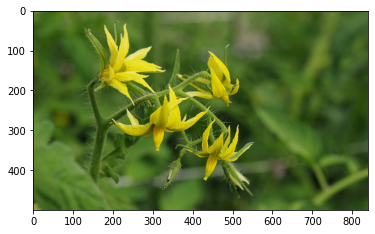

In [ ]:
# or download from URL using wget
!wget https://www.seipasa.com/files/images/img_flor-de-tomate.jpg -O flower.jpg
img = io.imread('flower.jpg')
plt.imshow(img)

Processing 1 images
image                    shape: (500, 840, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  129.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  840.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


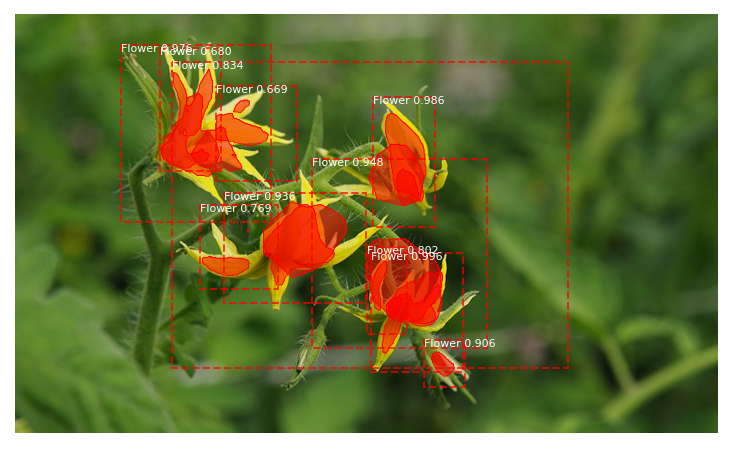

In [ ]:
import skimage

mask_colors = [
    (0., 0., 0.), # Background (class 0)
    (1., 0., 0.)#, # Flower (class 1)
    #(0., 1., 0.)  # Add here, for other classes
]


img_arr = np.array(img)

results = test_model.detect([img_arr], verbose=1)
r = results[0]

colors = tuple(np.take(mask_colors, r['class_ids'], axis=0))

visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], figsize=(16, 8),
                            colors=colors)

In [ ]:
# playing around with the results.
# the results is a dictionary
r.keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])

In [ ]:
# let's access the dictionary values
masks = r.get("masks")
class_ids = r.get("class_ids")
scores = r.get("scores")

In [ ]:
# these are the scores (remember, we could of changed the minimum score up top)
scores

array([0.99606776, 0.98565185, 0.9759641 , 0.94835126, 0.9364079 ,
       0.90552396, 0.83355814, 0.8020978 , 0.76905066, 0.67973715,
       0.66865355], dtype=float32)

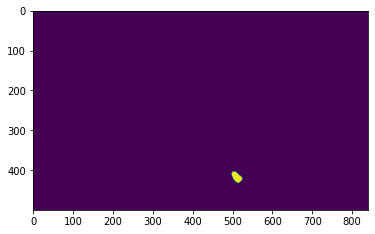

In [ ]:
# displaying a mask for example
plt.imshow(masks[:,:,5])

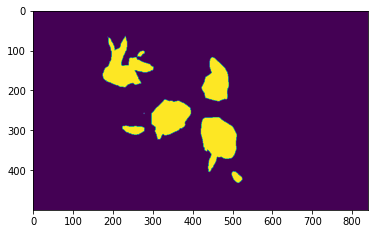

In [ ]:
# let's try to mask out the backgruond
total_mask = masks[:,:,0].copy()
for i in range(len(scores)):
  total_mask = total_mask + masks[:,:,i]
plt.imshow(total_mask)

In [ ]:
# convert mask shape from (500,840) to (500,840,3) 
threeD_mask = np.stack((total_mask, total_mask, total_mask),axis=-1)

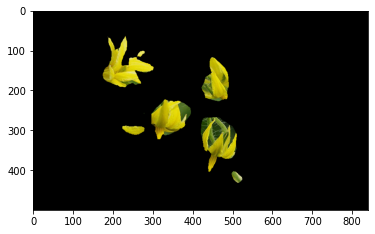

In [ ]:
# display the flowers segmented
plt.imshow(threeD_mask*img)